# Blackjack

In [66]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [89]:
num_runs = 500000

In [90]:
# Given card number, get Value associated
card_to_value = {}
num_cards = 14
for i in range(num_cards):
    if i > 10:
        card_to_value[i] = 10
    else:
        card_to_value[i] = i

card_to_value[0] = 11

In [91]:
# Get action given sum of card values for player and dealer - policy

sum_to_action_player = {}
sum_to_action_dealer = {}

num_states = 22
num_actions = 2

for i in range(num_states):
    if i < 20:
        sum_to_action_player[i] = "hit"
    elif i >= 20:
        sum_to_action_player[i] = "stick"
    
    if i < 17:
        sum_to_action_dealer[i] = "hit"
    elif i >= 17:
        sum_to_action_dealer[i] = "stick"
        
print(sum_to_action_player)

{0: 'hit', 1: 'hit', 2: 'hit', 3: 'hit', 4: 'hit', 5: 'hit', 6: 'hit', 7: 'hit', 8: 'hit', 9: 'hit', 10: 'hit', 11: 'hit', 12: 'hit', 13: 'hit', 14: 'hit', 15: 'hit', 16: 'hit', 17: 'hit', 18: 'hit', 19: 'hit', 20: 'stick', 21: 'stick'}


In [92]:
def game():
    
    # Set usable ace to false, card sums to 0
    player_usable_ace = False
    dealer_usable_ace = False
    sumcardsp = 0
    sumcardsd = 0
    
    # Generate 2 cards for both player and dealer
    player_card1 = np.random.randint(1, num_cards)
    player_card2 = np.random.randint(1, num_cards)
    dealer_card1 = np.random.randint(1, num_cards)
    dealer_card2 = np.random.randint(1, num_cards)
    
    # Define dealer's first card as open card
    open_card = card_to_value[dealer_card1]
    
    # Update usable ace to True if either card is an ace
    if player_card1 == 1 or player_card2 == 1:
        player_usable_ace = True
    if dealer_card1 == 1 or dealer_card2 == 1:
        dealer_usable_ace = True
    
    # Get card sums
    sumcardsp = card_to_value[player_card1] + card_to_value[player_card1]
    sumcardsd = card_to_value[dealer_card1] + card_to_value[dealer_card1]
    
    # States are tuples of 3 values - current player card sum, boolen usable ace and dealer's open card
    states = []
    if sumcardsp >= 12:
        states.append((sumcardsp, player_usable_ace, open_card))
    
    # If card sum if 22, means 2 aces, then make one ace as 1
    if sumcardsp > 21:
        sumcardsp = sumcardsp - 10
    if sumcardsd > 21:
        sumcardsd = sumcardsd - 10
    
    # If card sum = 21, checkc for win/draw
    if sumcardsp == 21:
        if sumcardsd != 21:
            reward = 1
            return states, reward
        else:
            reward = 0
            return states, reward

    if sumcardsd == 21:
        if sumcardsp != 21:
            reward = -1
            return states, reward
    
    # Player's turn
    # Loop till hit
    while(sum_to_action_player[sumcardsp] == "hit"):
        # Deal a new card, add value to card sum
        player_card = np.random.randint(1, num_cards)
        sumcardsp += card_to_value[player_card]

        # Update usabale ace
        if player_card == 1:
            player_usable_ace = True
        
        # Append player state
        if sumcardsp >= 12:
            if sumcardsp > 21:
                if player_usable_ace == True:
                    states.append((sumcardsp - 10, False, open_card))
                else:
                    return states, -1
            else:
                states.append((sumcardsp, player_usable_ace, open_card))
        
        # Chcek for player win
        if sumcardsp == 21:
            reward = 1
            return states, reward
        
        # Chcek for player bust
        if sumcardsp > 21:
            if player_usable_ace == True:
                sumcardsp = sumcardsp - 10 # make one ace as 1
                player_usable_ace = False
            else:
                reward = -1
                return states, reward
    
    # Player's sum value here is 20
    
    # Dealer's turn
    # Loop till hit
    while(sum_to_action_dealer[sumcardsd] == "hit"):
        # Deal a new card, add value to card sum
        dealer_card = np.random.randint(1, num_cards)
        sumcardsd += card_to_value[dealer_card]
        
        # Update usable ace
        if dealer_card == 1:
            dealer_usable_ace = True
        
        # Check for dealer win
        if sumcardsd == 21:
            reward = -1
            return states, reward
        
        # Check for dealer bust
        if sumcardsd > 21:
            if dealer_usable_ace == True:
                sumcardsd = sumcardsd - 10 # make one ace as 1
                dealer_usable_ace = False
            else:
                reward = 1
                return states, reward
    
    # Both turns over, now compare difference from 21 and check for player win/draw
    if sumcardsp == sumcardsd:
        reward = 0
        return states, reward
    else:
        reward = 1
        return states, reward

In [93]:
globalgrid_usable = np.zeros((10, 10))
globalgrid_nousable = np.zeros((10, 10))
counter_usable = np.zeros((10, 10))
counter_nousable = np.zeros((10, 10))

# Run for num_run times
for i in range(num_runs):
    grid_usable = np.zeros((10, 10))
    grid_nousable = np.zeros((10, 10))
    
    states, reward = game()
    for state in states:
        if state[1] == True:
            if state[2] == 11:
                state[2] = 1
            # Update matrix
            grid_usable[state[0]-12, state[2]-1] = reward
            counter_usable[state[0]-12, state[2]-1] += 1
        else:
            if state[2] == 11:
                state[2] = 1
            # Update matrix
            grid_nousable[state[0]-12, state[2]-1] = reward
            counter_nousable[state[0]-12, state[2]-1] += 1
    
    globalgrid_usable += grid_usable
    globalgrid_nousable += grid_nousable

globalgrid_usable /= counter_usable
globalgrid_nousable /= counter_nousable

[[5.40540541 0.         0.51351351]
 [0.         5.40540541 0.51351351]
 [0.         0.         1.        ]]
[[ 21.744   0.    338.58 ]
 [  0.    108.72   90.36 ]
 [  0.      0.      1.   ]]
[[ 1.  0. -0.]
 [ 0.  1. -0.]
 [ 0.  0.  1.]]
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
[[ 21.744   0.    295.28 ]
 [  0.    108.72   65.06 ]
 [  0.      0.      1.   ]]


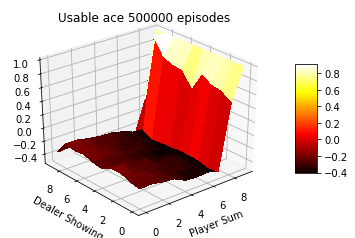

[[5.40540541 0.         0.51351351]
 [0.         5.40540541 0.51351351]
 [0.         0.         1.        ]]
[[ 21.744   0.    338.58 ]
 [  0.    108.72   90.36 ]
 [  0.      0.      1.   ]]
[[ 1.  0. -0.]
 [ 0.  1. -0.]
 [ 0.  0.  1.]]
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
[[ 21.744   0.    295.28 ]
 [  0.    108.72   65.06 ]
 [  0.      0.      1.   ]]


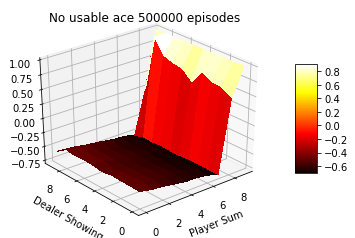

In [94]:
# Plotting code taken from https://stackoverflow.com/questions/11766536/matplotlib-3d-surface-from-a-rectangular-array-of-heights
# Plot
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

X = np.arange(0, 10)
Y = np.arange(0, 10)
X, Y = np.meshgrid(X, Y)
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.view_init(azim=-130)
ax.set_xlabel("Player Sum")
ax.set_ylabel("Dealer Showing")
ax.set_title("Usable ace 500000 episodes")
surf = ax.plot_surface(Y, X, globalgrid_usable, rstride=1, cstride=1, cmap='hot', linewidth=0, antialiased=False)
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.view_init(azim=-130)
ax.set_xlabel("Player Sum")
ax.set_ylabel("Dealer Showing")
ax.set_title("No usable ace 500000 episodes")
surf = ax.plot_surface(Y, X, globalgrid_nousable, rstride=1, cstride=1, cmap='hot', linewidth=0, antialiased=False)
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()